In [1]:
%load_ext autoreload 
%autoreload 2


In [2]:

#lb
import pandas as pd
edges = pd.concat([
    pd.read_parquet(f'/home/anhphantq/unidata_sub/edges_sub_frag_{i}_v1.parquet') for i in range (64) 
    ])
edges_test = pd.read_parquet('/home/anhphantq/unidata_sub/edges_test_sub_v1.parquet')

vertices = pd.read_parquet('/home/anhphantq/unidata_sub/train_vprops_v1.parquet')
vertices_test = pd.read_parquet('/home/anhphantq/unidata_sub/test_vprops_v1.parquet')

item_agg = pd.read_parquet('/home/anhphantq/unidata_sub/item_props_v1.parquet')
item_glob = pd.read_parquet('/home/anhphantq/unidata_sub/item_glob_v1.parquet')
recent_interacts = pd.concat([
    pd.read_parquet(f'/home/anhphantq/unidata_sub/interact/recent_interacts_frag_{i}_v1.parquet') for i in range (64) 
    ])

user_features_df = pd.read_parquet('/home/anhphantq/unidata_sub/user_features.parquet')
item_features_df = pd.read_parquet('/home/anhphantq/unidata_sub/item_features.parquet')

In [2]:

#valid
import pandas as pd
edges = pd.concat([
    pd.read_parquet(f'/home/anhphantq/splitted_unidata_sub/edges_sub_frag_{i}_v1.parquet') for i in range (64) 
    ])
edges_test = pd.read_parquet('/home/anhphantq/splitted_unidata_sub/edges_test_sub_v1.parquet')

vertices = pd.read_parquet('/home/anhphantq/splitted_unidata_sub/train_vprops_v1.parquet')
vertices_test = pd.read_parquet('/home/anhphantq/splitted_unidata_sub/test_vprops_v1.parquet')
item_agg = pd.read_parquet('/home/anhphantq/splitted_unidata_sub/item_props_v1.parquet')
item_glob = pd.read_parquet('/home/anhphantq/splitted_unidata_sub/item_glob_v1.parquet')
recent_interacts = pd.concat([
    pd.read_parquet(f'/home/anhphantq/splitted_unidata_sub/interact/recent_interacts_frag_{i}_v1.parquet') for i in range (64) 
    ])
user_features_df = pd.read_parquet('/home/anhphantq/splitted_unidata_sub/user_features.parquet')
item_features_df = pd.read_parquet('/home/anhphantq/splitted_unidata_sub/item_features.parquet')

In [3]:
recent_interacts = recent_interacts[~recent_interacts.index.duplicated(keep='first')]


In [4]:
MIN_TS = edges.iloc[:, 2].min()
MAX_TS = edges.iloc[:, 2].max() + 1
NUM_AIDS = edges.iloc[:, 1].max() + 1
assert edges.iloc[:, 1].min() == 0
NUM_TRAIN_EDGES = edges.shape[0]
MIN_TS, MAX_TS, NUM_TRAIN_EDGES

(0, 1814400, 91978305)

In [5]:
from meow_utils import feature_id_map
import numpy as np 
# disk_vp = np.memmap('splitted_vertice_properties.array', dtype='float64', mode='r').reshape(len(feature_id_map), -1)
disk_vp = np.fromfile('splitted_vertice_properties.array').reshape(len(feature_id_map), -1)
disk_vp.setflags(write = False)

In [5]:
from meow_utils import feature_id_map
import numpy as np 
# disk_vp = np.memmap('vertice_properties.array', dtype='float64', mode='r').reshape(len(feature_id_map), -1)
disk_vp = np.fromfile('vertice_properties.array').reshape(len(feature_id_map), -1)
disk_vp.setflags(write = False)

In [6]:
JOIN = True

In [6]:
JOIN = False

In [7]:
#Params
import numpy as np
TEST_CLICK_WEIGHT = 3
TEST_CART_WEIGHT = 6
TEST_ORDER_WEIGHT_L= 6
TEST_ORDER_WEIGHT_S = 2

MAX_NUM_CANDS = 300

MIN_TOPK_COUSER = 1000
COFITNESS_THRES = 0


ALPHA = 0.5
BETA = 0.5
FILTER = False

#PARAMS

get_test_items_params = {
      'test_click_weight': TEST_CLICK_WEIGHT,
      'test_cart_weight': TEST_CART_WEIGHT,
      'test_order_weight_l': TEST_ORDER_WEIGHT_L,
      'test_order_weight_s': TEST_ORDER_WEIGHT_S,
      'day' : 3600 * 8,  
  }

get_items_params = {
      'click_weight': 3,
      'cart_weight' : 10,
      'order_weight': 1,
      'day' : 3600 * 8,  
    }



# Create edges and vertices

In [8]:
first_test_session = edges_test.iloc[0,0]

In [9]:
all_edges = pd.concat((edges, edges_test))

In [10]:
del edges, edges_test

In [11]:
all_vertices = pd.concat((vertices, vertices_test))

In [12]:
del vertices, vertices_test

In [13]:
all_edges

,"('session', '')","('aid', '')","('ts', 'last')","('ts', 'first')","('clicks', 'sum')","('carts', 'sum')","('orders', 'sum')","('subsession', 'encode')"
0,0,6851,1417218,1417218,1,0,0,134217728
1,0,7563,1426553,1426515,2,0,0,268435456
2,0,10268,1248351,1248351,1,0,0,8388608
3,0,30373,1194087,1194087,1,0,0,4194304
4,0,72748,1417081,1417081,1,0,0,134217728
...,...,...,...,...,...,...,...,...
5006552,14571577,1141710,2419174,2419174,1,0,0,1
5006553,14571578,519105,2419175,2419175,1,0,0,1
5006554,14571579,739876,2419175,2419175,1,0,0,1
5006555,14571580,202353,2419181,2419181,1,0,0,1


In [14]:
all_vertices

,"('session', '')","('ts', 'min')","('ts', 'max')","('ts', 'count')","('subsession', 'max')","('consistency', '')"
0,0,1659964140,1661684983,168,38,1720843
1,1,1659990929,1661714854,19,6,1723925
2,2,1660521816,1661714215,24,3,1192399
3,3,1659912605,1661109666,80,11,1197061
4,4,1661161611,1661586681,16,2,425070
...,...,...,...,...,...,...
1671798,14571577,1662328774,1662328774,1,0,0
1671799,14571578,1662328775,1662328775,1,0,0
1671800,14571579,1662328775,1662328775,1,0,0
1671801,14571580,1662328781,1662328781,1,0,0


In [15]:
MAX_SESSION = all_vertices.iloc[:,0].max()  + 1
all_edges.iloc[:,1] = all_edges.iloc[:,1] + MAX_SESSION


In [16]:
all_vertices = all_vertices.values

In [17]:
import numpy as np
all_edges = all_edges.values

# Load to graph

In [18]:
import graph_tool

In [19]:
from graph_tool import Graph
ug = Graph(directed=False)

In [20]:
vmap = ug.add_edge_list(all_edges[:, : 2].astype(np.uint32))

In [21]:
ug.num_vertices(), ug.num_edges()

(16427185, 96984862)

In [22]:
#short type
all_edges[:, 4 : 7] = np.clip (all_edges[:, 4 : 7], 0,  32767)

In [23]:
data_type = {
    'elts': 'unsigned int',
    'efts': 'unsigned int',
    'eclick': 'unsigned int',
    'ecart': 'unsigned int',
    'eorder': 'unsigned int',
    'esub': 'unsigned long'
}

In [24]:
for i, prop in enumerate(['elts', 'efts', 'eclick', 'ecart', 'eorder', 'esub']):
  setattr(ug.ep, prop, ug.new_ep(data_type[prop], vals = all_edges[:, i + 2]))  


In [25]:
del all_edges

In [26]:
elts = ug.ep['elts']
efts = ug.ep['efts']
eclick = ug.ep['eclick']
ecart = ug.ep['ecart']
eorder = ug.ep['eorder']
esub = ug.ep['esub']


In [26]:
vp = {}
vp['num_sub'] = ug.new_vp('double',  all_vertices[:, -2] ).get_array()
vp['consistency'] = ug.new_vp('double',  1 / (1 + np.log(all_vertices[:, -1] + 1)) ).get_array()
vp['num_actions'] = ug.new_vp('unsigned int', all_vertices[:, -3]).get_array()

In [27]:
del all_vertices

In [28]:
from graph_tool.stats import remove_parallel_edges
remove_parallel_edges(ug)

# Count actions

In [29]:
from graph_tool import incident_edges_op
vp['num_clicks'] = incident_edges_op(ug, "out", "sum", eclick).get_array()
vp['num_carts'] = incident_edges_op(ug, "out", "sum", ecart).get_array()
vp['num_orders'] = incident_edges_op(ug, "out", "sum", eorder).get_array()

# Get degree

In [30]:
vp['degree'] = ug.get_total_degrees(np.arange(ug.num_vertices()))

# Pagerank

In [31]:
%%time
import graph_tool.centrality as gt
vp['pr'] = gt.pagerank(ug).get_array()

CPU times: user 14min 27s, sys: 388 ms, total: 14min 27s
Wall time: 57.8 s


# Recent 7 day graph features

In [32]:
#remove item not interact in recent 7 days
efilter = (MAX_TS - elts.get_array() - 3600 * 24 * 7) < 0

In [33]:
from graph_tool import GraphView
fug = GraphView(ug, efilt = efilter)

In [34]:
vp['recent_num_clicks'] = incident_edges_op(fug, "out", "sum", eclick).get_array()
vp['recent_num_carts'] = incident_edges_op(fug, "out", "sum", ecart).get_array()
vp['recent_num_orders'] = incident_edges_op(fug, "out", "sum", eorder).get_array()
vp['recent_degree'] = fug.get_total_degrees(np.arange(fug.num_vertices()))
vp['recent_pr'] = gt.pagerank(fug).get_array()

# Item Features

In [35]:
item_agg

,aid,recent_day7_type0,recent_day7_type1,recent_day7_type2,recent_day6_type0,recent_day6_type1,recent_day6_type2,recent_day5_type0,recent_day5_type1,recent_day5_type2,...,recent_day4_type2,recent_day3_type0,recent_day3_type1,recent_day3_type2,recent_day2_type0,recent_day2_type1,recent_day2_type2,recent_day1_type0,recent_day1_type1,recent_day1_type2
0,0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,2.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3,206.0,18.0,5.0,99.0,11.0,0.0,13.0,0.0,0.0,...,3.0,211.0,27.0,6.0,228.0,19.0,2.0,335.0,32.0,7.0
4,4,8.0,1.0,0.0,12.0,1.0,0.0,7.0,0.0,0.0,...,0.0,8.0,1.0,0.0,10.0,0.0,0.0,14.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1839553,1855598,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1839554,1855599,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1839555,1855600,2.0,0.0,0.0,4.0,0.0,0.0,3.0,2.0,0.0,...,0.0,4.0,1.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0
1839556,1855601,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
item_index = item_agg.aid.values + MAX_SESSION

In [37]:
for i, col in enumerate(item_agg.columns[1:]):
    val = np.zeros(ug.num_vertices(), dtype= int)
    val[item_index] = item_agg.values[:, 1 + i]
    vp[col] = val 

In [38]:
del item_agg, item_index

# Item Glob Features

In [39]:
item_glob

,"('aid', '')","('scaled_ts', 'max')","('scaled_ts', 'min')","('time_decay', 'sum')","('click', 'sum')","('cart', 'sum')","('order', 'sum')"
0,0,20.863345,1.452789,13.572334,13.572334,0.000000,0.000000
1,1,17.508866,2.738449,7.465299,7.319284,0.146015,0.000000
2,2,19.611991,4.524248,6.230244,6.230244,0.000000,0.000000
3,3,20.984317,0.434826,1461.256950,1322.898875,115.314236,23.043839
4,4,20.898519,0.388796,79.325614,75.313527,4.012088,0.000000
...,...,...,...,...,...,...,...
1839553,1855598,17.944850,0.741273,2.034551,2.034551,0.000000,0.000000
1839554,1855599,19.679792,3.639051,4.168844,4.168844,0.000000,0.000000
1839555,1855600,20.814815,1.492014,27.600753,25.150745,2.321962,0.128045
1839556,1855601,12.285602,0.274120,7.111232,6.075555,1.035678,0.000000


In [40]:
item_index = item_glob.iloc[:,0].values + MAX_SESSION

In [41]:
from meow_utils import glob_features

In [42]:
for i, col in enumerate(glob_features[:-1]):
    val = np.zeros(ug.num_vertices(), dtype= float)
    val[item_index] = item_glob.values[:, 1 + i]
    vp[col] = val 


In [43]:
vp['item_glob_durability']= np.zeros(ug.num_vertices(), dtype= float)
vp['item_glob_durability'][item_index] = item_glob.iloc[:,1].values - item_glob.iloc[:,2].values


In [44]:
del item_glob, item_index


# Create Disk VP

In [45]:
vp.keys()

dict_keys(['num_sub', 'consistency', 'num_actions', 'num_clicks', 'num_carts', 'num_orders', 'degree', 'pr', 'recent_num_clicks', 'recent_num_carts', 'recent_num_orders', 'recent_degree', 'recent_pr', 'recent_day7_type0', 'recent_day7_type1', 'recent_day7_type2', 'recent_day6_type0', 'recent_day6_type1', 'recent_day6_type2', 'recent_day5_type0', 'recent_day5_type1', 'recent_day5_type2', 'recent_day4_type0', 'recent_day4_type1', 'recent_day4_type2', 'recent_day3_type0', 'recent_day3_type1', 'recent_day3_type2', 'recent_day2_type0', 'recent_day2_type1', 'recent_day2_type2', 'recent_day1_type0', 'recent_day1_type1', 'recent_day1_type2', 'item_glob_last_action', 'item_glob_first_action', 'item_glob_time_decay_sum', 'item_glob_time_decay_sum_click', 'item_glob_time_decay_sum_cart', 'item_glob_time_decay_sum_order', 'item_glob_durability'])

In [46]:
shape = None
for k in vp.keys():
  vp[k] = np.array(vp[k])
  if shape:
    assert vp[k].shape == shape, (k, vp[k].shape, shape)
  else:
    shape = vp[k].shape

In [47]:
import multiprocessing
mem_size = (len(vp.keys()), vp[k].shape[0])
mem_size

(41, 16427185)

In [48]:
disk_vp = np.memmap('splitted_vertice_properties.array', dtype='float64', mode='w+', shape=(mem_size[0],mem_size[1]))


In [48]:
disk_vp = np.memmap('vertice_properties.array', dtype='float64', mode='w+', shape=(mem_size[0],mem_size[1]))


In [49]:
for i, k in enumerate(vp.keys()):
  disk_vp[i] = vp[k] 


In [50]:
del vp

# Load VP

In [29]:
assert disk_vp.shape[1] == ug.num_vertices(), (disk_vp.shape[1], ug.num_vertices())

# Load test

In [30]:
ROOT = '/home/anhphantq/otto'
DATA_FOLDER = ROOT + '/data'



In [32]:
ROOT = '/home/anhphantq/otto'
DATA_FOLDER = ROOT + '/splitted_data'



In [31]:
import pandas as pd
test_df = pd.read_parquet(DATA_FOLDER + '/test.parquet')

In [32]:
import numpy as np
session_list = np.sort(test_df['session'].unique())


In [35]:
session_list = session_list[:len(session_list) // 20]

In [33]:
session_list = session_list[9 * len(session_list) // 20 : 12 * len(session_list) // 20]


In [33]:
len(session_list)

1671803

In [34]:
del test_df

# Find neighbour strategy

In [35]:
from meow_utils import USER_FEATURES, ITEM_FEATURES, \
feature_id_map, recent_features_id_map, recent_features, \
glob_features_id_map, glob_features

user_feature_ids = [feature_id_map[f] for f in USER_FEATURES]
all_item_feature_ids = [feature_id_map[f] for f in ITEM_FEATURES]

recent_feature_ids = [recent_features_id_map[f] for f in recent_features]
glob_feature_ids = [glob_features_id_map[f] for f in glob_features]
len(user_feature_ids), len(all_item_feature_ids)

(7, 38)

In [36]:

def get_user_features(user):
  return [disk_vp[feature_id_map[f]][user] for f in USER_FEATURES]

def get_item_features(items, id_list):

  return [
      np.array([
          disk_vp[i][item] for item in items 
      ]) for i in id_list
  ]


def get_test_items(user, beta):
  global ug, fug, elts, eclick, ecart, eorder, get_test_items_params, FILTER
  #0: src, 1: target, 2: lts, 3: eclick, 4: ecart, 5:eorder 6 subsession, 7 ftss
  edges = ug.get_all_edges(user, eprops = [elts, eclick, ecart, eorder, esub, efts])
        
  return _get_test_items(edges, beta, **get_test_items_params)


def get_user_neighbours(item):
  global ug, fug, elts, efts, eclick, ecart, eorder, esub, FILTER
  #1 target 2 ltss 3 ftss 4 click 5 cart 6 order 7 subsession
  edges = ug.get_all_edges(item, eprops = [elts, efts, eclick, ecart, eorder, esub])
  return edges[:,1], edges[:,2], edges[:,3], edges[:, 4], edges[:, 5], edges[:, 6], edges[:, 7]
  

def get_item_neighbours(user, lts, fts, prevsub, prev_click, prev_cart, prev_order, alpha):
  global ug, fug, elts, efts, eclick, ecart, eorder, esub, get_items_params, FILTER
  #edge idx: 0 is src, 1 is target, 2 is last time stamp, 3 is first time stamp, 4 click, 5 cart, 6 order, 7 subsession

  edges = ug.get_all_edges(user, eprops = [elts, efts, eclick, ecart, eorder, esub])
  assert len(edges) == len(np.unique(edges[:, 1])), (len(edges) , len(np.unique(edges[:, 1])))
  return _get_item_neighbours(edges, lts, fts, prev_click = prev_click, prev_cart = prev_cart, prev_order = prev_order
                              , alpha = alpha, prevsub = prevsub, **get_items_params)


# Numba funcs

In [37]:
import numba as nb
import numpy as np
from numba import prange
    
@nb.njit(nb.float64[:](nb.int64[:]), cache = True, nogil = True)
def reverse_normalize(X):
  m = np.max(X)
  return (m - X) / (m - np.min(X) + 1e-12) 

@nb.njit(nb.float64[:](nb.int64[:]), cache = True, nogil = True)
def normalize(X):
  m = np.max(X)
  return (X - np.min(X)) / (m - np.min(X) + 1e-12) 

@nb.njit([nb.int64[:](nb.float64[:]),
          nb.int64[:](nb.int64[:]),
          ], cache = True, nogil = True)
def get_rank(x):
  return np.argsort(np.argsort(x))

@nb.njit(nb.int64(nb.int64), cache = True, nogil = True)
def decode_1d(x):
  rs = 0
  while x > 0:
    if x % 2 == 1:
      rs += 1
    x = x // 2
  return rs

@nb.njit(nb.int64[:](nb.int64[:]), cache = True, nogil = True)
def decode_2d(x):
  return np.array([decode_1d(i) for i in x])



@nb.njit([
  nb.float64[:, :](nb.float64[:,:]),
  nb.int64[:, :](nb.int64[:,:]),
          ])
def cumsum_2d(x):
  result = np.empty_like(x)
  result[:, 0] = x[:, 0]
  for i in prange(1, x.shape[1]):
    result[:, i] = x[:, i] +  result[:, i - 1]
  return result


@nb.njit([nb.float64[:](nb.float64[:], nb.float64, nb.float64),
          nb.float64[:](nb.float64[:], nb.int64, nb.float64),
          nb.float64[:](nb.float64[:], nb.float64, nb.int64),
          nb.float64[:](nb.int64[:], nb.float64, nb.int64),
         nb.float64[:](nb.float64[:], nb.int64, nb.int64)], cache = True, nogil = True)
def normalize_to_range(X, l, r):
  m = np.min(X)
  return (X - m) / (np.max(X) - m + 1e-12) * (r -l) + l


@nb.njit([
          nb.types.Tuple((nb.int64[:], nb.float64[:,:], nb.int64[:])) (nb.int64[:], nb.float64[:,:]),
          nb.types.Tuple((nb.int64[:], nb.int64[:,:], nb.int64[:])) (nb.int64[:], nb.int64[:,:]),
          ], cache = True, nogil = True)
def sum_by_group_multiple_values_return_num_appearance(groups, values):
    #values shape n_values * n_items
    order = np.argsort(groups)

    groups = groups[order]
    values = values[:, order]
    values = cumsum_2d(values)

    index = np.ones(len(groups), 'bool')
    index[:-1] = groups[1:] != groups[:-1]
    nodes = np.hstack((np.array([0]), np.where(index)[0] + 1))

    values = values[:, index]

    groups = groups[index]
    values[:, 1:] = values[:, 1:] - values[:, :-1]
    return groups, values, nodes[1:] - nodes[:-1]

@nb.njit([
          nb.types.Tuple((nb.int64[:], nb.float64[:,:])) (nb.int64[:], nb.float64[:,:]),
          nb.types.Tuple((nb.int64[:], nb.int64[:,:])) (nb.int64[:], nb.int64[:,:]),
          ], cache = True, nogil = True)
def sum_by_group_multiple_values(groups, values):
    #values shape n_values * n_items
    order = np.argsort(groups)

    groups = groups[order]
    values = values[:, order]
    values = cumsum_2d(values)

    index = np.ones(len(groups), 'bool')
    index[:-1] = groups[1:] != groups[:-1]
    

    values = values[:, index]

    groups = groups[index]
    values[:, 1:] = values[:, 1:] - values[:, :-1]
    return groups, values

@nb.njit([
          nb.types.Tuple((nb.int64[:], nb.float64[:, :], nb.int64[:])) (nb.int64[:], nb.float64[:,:], nb.int64[:]),
          nb.types.Tuple((nb.int64[:], nb.int64[:, :], nb.int64[:])) (nb.int64[:], nb.int64[:,:], nb.int64[:]),
          ], cache = True, nogil = True)
def sum_by_group_exclude_multiple_values_return_num_appearance(groups, values, exclude):
    #remove existed items
    inclusive = np.ones(len(groups), 'bool')
    for e in exclude:
      inclusive = inclusive & (groups != e)
    #values shape n_values * n_items
    return  sum_by_group_multiple_values_return_num_appearance(groups[inclusive], values[:, inclusive])

    
@nb.njit([
          nb.types.Tuple((nb.int64[:], nb.float64[:,:,:])) (nb.int64[:], nb.float64[:,:,:]),
          ], cache = True, nogil = True)
def sum_by_group_multiple_values_2d(groups, values):
    order = np.argsort(groups)

    groups = groups[order]
    #first axis of values  is 3 types of actions , second axisis heterogenous, third axis is different items
    values = values[:, :, order]
    for i in prange(values.shape[0]):
      values[i] = cumsum_2d(values[i])

    index = np.ones(len(groups), 'bool')
    index[:-1] = groups[1:] != groups[:-1]

    values = values[:, :, index]

    groups = groups[index]
    values[:, :, 1:] = values[:, :,1:] - values[:, :,:-1]

    return groups, values

@nb.njit([
          nb.types.Tuple((nb.int64[:], nb.float64[:,:,:])) (nb.int64[:], nb.float64[:,:,:]),
          ], cache = True, nogil = True)
def max_by_group_multiple_values_2d(groups, values):
    order = np.argsort(groups)

    groups = groups[order]
    #first axis of values  is 3 types of actions , second axisis heterogenous, third axis is different items
    values = values[:, :, order]
    

    index = np.ones(len(groups), 'bool')
    index[:-1] = groups[1:] != groups[:-1]
    groups = groups[index]
    ends = np.where(index)[0]

    k = 0
    for i in prange(1, values.shape[2]):
        if i != ends[k] + 1:
            values[:, :, i] = np.maximum(values[:, :, i], values[:, :, i - 1])
        else:
            k+=1
    
    values = values[:, :, index]

    return groups, values

@nb.njit(nb.types.Tuple((nb.int64[:], nb.float64[:],
                         nb.int64[:], nb.int64[:],
                         nb.int64[:], nb.int64[:],
                         nb.float64[:], nb.float64[:],
                         nb.float64[:], nb.int64[:],
                         nb.int64[:]))(nb.int64[:, :], nb.float64, nb.float64, nb.float64, nb.float64, nb.float64, nb.int64) , cache = True, nogil = True)
def _get_test_items(edges, beta, test_click_weight, test_cart_weight, test_order_weight_l, test_order_weight_s, day):
  #0: src, 1: target, 2: lts, 3: eclick, 4: ecart, 5:eorder 6:susbsession, 7 fts
  
  time_decay = beta ** reverse_normalize(edges[:, 2])

  order_weight = np.where(edges[:, 5] > 1, test_order_weight_l, test_order_weight_s)

  weight = edges[:, 3] * test_click_weight + edges[:, 4] * test_cart_weight + order_weight 

  fitness =  time_decay * weight 

  order = np.argsort(-fitness)

  num_subsession = decode_2d(edges[ :, 6])
  return edges[order, 1], fitness[order], edges[order, 3] , edges[order, 4], edges[order, 5], \
          num_subsession[order], time_decay[order], normalize_to_range(edges[order,2], 0.3, 1), normalize_to_range(edges[order, 7], 0.3, 1), edges[order, 2] - edges[order, 7], edges[order, 3] + edges[order, 4] + edges[order, 5]
          

@nb.njit([
          nb.types.Tuple((nb.int64[:], nb.float64[:], nb.int64[:], nb.boolean[:])) (nb.int64[:], nb.float64[:], nb.int64, nb.float64),
          nb.types.Tuple((nb.int64[:], nb.int64[:], nb.int64[:], nb.boolean[:])) (nb.int64[:], nb.int64[:], nb.int64, nb.float64),
          # nb.types.Tuple((nb.int64[:], nb.int64[:], nb.int64[:], nb.boolean[:])) (nb.float64[:], nb.float64[:], nb.int64, nb.float64),
          ], cache = True, nogil = True)
def find_topk_user(cousers, cofitness, min_topk_user, cofitness_thres):
  #sort cousers ascending by id
  order = np.argsort(cousers)
  cousers = cousers[order]
  cofitness = cofitness[order]

  #calculate groupby sum of cousers
  cumcofitness = np.cumsum(cofitness)

  #find unique
  index = np.ones(len(cousers), 'bool')

  #this is the last index of each group
  index[:-1] = cousers[1:] != cousers[:-1]
  cumcofitness = cumcofitness[index]
  

  #find start and end of groups
  nodes = np.hstack((np.array([0]), np.where(index)[0] + 1))

  starts = nodes[:-1]
  ends = nodes[1:]
  lens = ends - starts
  rank_nums = get_rank(lens)
    
  #caluculate groupby sum of cousers
  cumcofitness[1:] = cumcofitness[1:] - cumcofitness[:-1]

  rank_fit = get_rank(cumcofitness)
  
  order_fit = np.argsort(-(rank_nums + rank_fit))

  k = min_topk_user
  if cofitness_thres > 0:
    #get topk user
    #dynamic top user
    total_fitness = np.sum(cumcofitness)
    
    k = 0
    remain = 0
    thresh_hold = cofitness_thres * total_fitness
    while remain < thresh_hold:
      remain += cumcofitness[order_fit][k]
      k+=1 
    
    if k < min_topk_user:
      k = min_topk_user

    if k > 500:
      k = 500

  
  order_fit = order_fit[:k]

  starts = nodes[order_fit]
  ends = nodes[order_fit + 1]
  
  filter = np.zeros(len(cousers), 'bool')
  for i in prange(len(starts)):
    filter[starts[i] : ends[i]] = 1
    cofitness[starts[i] : ends[i]] = cofitness[starts[i] : ends[i]] * (ends[i] - starts[i])
  return cousers[filter], cofitness[filter], order, filter

In [38]:
@nb.njit([
          nb.types.Tuple((nb.int64[:], nb.float64[:,:]))(nb.int64[:,:], nb.int64, nb.int64, nb.int64, nb.int64, nb.float64, nb.int64, nb.float64, nb.float64, nb.float64 , nb.float64, nb.int64), 
          nb.types.Tuple((nb.int64[:], nb.float64[:,:]))(nb.int64[:,:], nb.int64, nb.int64, nb.int64, nb.int64, nb.int64,   nb.int64, nb.float64, nb.int64, nb.int64, nb.int64, nb.int64), 
          ], cache = True, nogil = True)
def _get_item_neighbours(edges, lts, fts, prevsub, prev_click, prev_cart, prev_order, alpha, click_weight, cart_weight, order_weight, day):
  #edge idx: 0 is src, 1 is target, 2 is last time stamp, 3 is first time stamp, 4 click, 5 cart, 6 order, 7 -> subsession
  
  cosubsession = prevsub & edges[:, 7]
  cosubsession = decode_2d(cosubsession)
  subsession_coef = 1.8 ** np.clip(cosubsession, 0, 1)

  reverse_user_variety = 1  / (1 + np.log(np.sum(decode_2d(edges[:, 7])) + 1))
  reverse_user_consistency = 1 / (1 + np.log((np.amax(edges[:,2]) - np.amin(edges[:, 3])) + 1))


  coclick = np.sqrt(edges[:, 4] * prev_click)
  cocart = np.sqrt(edges[:, 5] * prev_cart)
  coorder = np.sqrt(edges[:, 6] * prev_order)
  

  #check if union, if yes time diff = 0, else = min(fts1 - lts2, fts2 - lts1)
  #calculate time diff
  u1 = np.absolute(lts - edges[:,3])
  u2 = np.absolute(fts - edges[:,2])
  union = np.maximum(u1, u2)
  
  
  
  l1 = lts - fts 
  l2 = edges[:, 2] - edges[:, 3]

  
  time_diff = (union - (l1 + l2) / 2) / day 

  time_decay = alpha ** time_diff
  
  
  coclick_sub_coef = coclick  * subsession_coef * reverse_user_variety * reverse_user_consistency 
  coclick_time_decay = coclick * time_decay  * reverse_user_variety * reverse_user_consistency 
  
  cocart_sub_coef = cocart  * subsession_coef * reverse_user_variety * reverse_user_consistency 
  cocart_time_decay = cocart * time_decay  * reverse_user_variety * reverse_user_consistency 
  
  coorder_sub_coef = coorder  * subsession_coef * reverse_user_variety * reverse_user_consistency 
  coorder_time_decay = coorder * time_decay  * reverse_user_variety * reverse_user_consistency 
  
  
  
  fitness_subco = coclick_sub_coef * click_weight + cocart_sub_coef * cart_weight + coorder_sub_coef * order_weight

  fitness_time_decay = coclick_time_decay * click_weight + cocart_time_decay * cart_weight + coorder_time_decay * order_weight
  #mark k most recent items
  k = 3
  if edges.shape[0] <= k:
    is_k_most_recent_items =  np.full(edges.shape[0], 1, dtype = np.float64)
  else:
    is_k_most_recent_items = (edges[:, 2] > edges[np.argsort( -edges[:, 2])[k], 2]).astype(np.float64)
  
  
  
  
  values_to_return = np.stack((
      fitness_subco, fitness_time_decay, cosubsession,
      coclick_sub_coef, cocart_sub_coef, coorder_sub_coef, coclick_time_decay, cocart_time_decay, coorder_time_decay, is_k_most_recent_items
  ), axis = 1)
  
  return edges[:, 1], values_to_return

# Step

In [39]:
cols = []
for i in range(7,0,-1):
    for j in range(3):
        cols.append(f'recent_inter_day{i}_type{j}')

In [40]:
from meow_utils import create_level1_data, create_level2_data, level1_columns, level2_columns, lincom_weights, index_recent_features

def get_type_items(user, data= None, ):

  global ALPHA, BETA, MIN_TOPK_COUSER, COFITNESS_THRES, Meow, GET_TEST_TRAIN, Meow_TEST, recent_interacts, GET_TRAIN, top_20_clicks, top_20_by2buy, top_20_buys
  #get user features
  
  ori_user_features = get_user_features(user)
  
  #fitness sorted descending
  items, fitness, num_clicks, num_carts, num_orders, \
   num_subsession, time_decay, lts, fts, consistency, num_interacts = get_test_items(user, BETA)

 
  #create level 1 features
  n = len(items)
  
  recent_inter = pd.DataFrame({
    #subtract max session to match index of the graph
    'session': np.full(n, user), 'aid': items - MAX_SESSION, **dict(zip(
      cols, [np.nan for c in cols]
    ))
  }).set_index(['session', 'aid'])
  
  try:
    recent_inter_ = recent_interacts.loc[user]
    
  except:
    recent_inter = np.zeros((n, 21))
  else:
    recent_inter = recent_inter.combine_first(recent_inter_).fillna(0).values
  

  level1_features = create_level1_data(np.transpose(np.stack((
                                      items[:n],
                                      fitness[:n],
                                      num_clicks[:n],
                                      num_carts[:n],
                                      num_orders[:n],
                                      num_subsession[:n],
                                      time_decay[:n],
                                      lts[:n],
                                      fts[:n],
                                      consistency[:n],
                                      num_interacts[:n],
                                      *list(np.transpose(recent_inter[:n])),
                                      np.full(n, 1),
                                      ))))
      
  #start look for level 2 items
    
  #get couser
  coalls = [get_user_neighbours(items[i]) for i in range(len(items))] 
  cofitness = np.concatenate([np.full_like(all[0], fitness[i]) for i, all in enumerate(coalls)] )

  #find topk cousers
  cousers, cofitness, order, filter  = find_topk_user(np.concatenate([all[0] for all in coalls]), cofitness, MIN_TOPK_COUSER, COFITNESS_THRES)
  coltss = np.concatenate([all[1] for all in coalls])[order][filter]
  coftss = np.concatenate([all[2] for all in coalls])[order][filter]
  coclick = np.concatenate([all[3] for all in coalls])[order][filter]
  cocart = np.concatenate([all[4] for all in coalls])[order][filter]
  coorder = np.concatenate([all[5] for all in coalls])[order][filter]
  cosubsession = np.concatenate([all[6] for all in coalls])[order][filter]
  
  #get coitems
  coalls = [get_item_neighbours(cousers[i], coltss[i], coftss[i], cosubsession[i], coclick[i], cocart[i], coorder[i], ALPHA) for i in range(len(cousers))]
  coitems = np.concatenate([all[0] for all in coalls])
  

  #multiply item by fitness of user which interacted with it
  
  cofitness = np.transpose(np.concatenate([all[1]* cofitness[i] for i, all in enumerate(coalls)]) )
  
  #count covisit
  coitems, cofitness, num_appearance= sum_by_group_multiple_values_return_num_appearance(coitems, cofitness)
  
  cofitness_cosub, cofitness_time_decay, num_cosub,\
  coclick_sub_coef, cocart_sub_coef, coorder_sub_coef,\
  coclick_time_decay, cocart_time_decay, coorder_time_decay, is_k_most_recent_items = (cofitness[i] for i in range(cofitness.shape[0]))
  
  #get item in covisit
  index_in_level1 = np.ravel(np.argwhere(np.in1d(coitems, items)))
  
  rank_cosub = get_rank(cofitness_cosub) * 10
  rank_time_decay = get_rank(cofitness_time_decay) * 10
  rank_num_appearance = get_rank(num_appearance) * 2

  
  rank_sum = rank_cosub  + rank_time_decay + rank_num_appearance
  
  order = np.argsort(-rank_sum)[:MAX_NUM_CANDS]
  
  #get most recent items from users
  order_most_recent = np.argsort(-is_k_most_recent_items)[:200]
  
  order = np.union1d(order, order_most_recent)
  
  #make sure all item in level 1 appended
  order = np.union1d(order, index_in_level1)
  if len(coitems):
    n = len(order)
    need_rerank = True

    features = [num_cosub[order],
                coclick_sub_coef[order],
                cocart_sub_coef[order],
                coorder_sub_coef[order],
                coclick_time_decay[order],
                cocart_time_decay[order],
                coorder_time_decay[order],                  
                num_appearance[order],
                is_k_most_recent_items[order],
                ]
    
    lincom_features = []
    
    for w1, w2, w3 in lincom_weights:
      lincom_features.append(coclick_sub_coef[order] * w1 + cocart_sub_coef[order] * w2 + coorder_sub_coef[order] * w3)
      lincom_features.append(coclick_time_decay[order] * w1 + cocart_time_decay[order] * w2 + coorder_time_decay[order] * w3)
    
    
    #quotient features
    norm_features = []
    for f in features + lincom_features:
      mean  = f.mean()
      norm_features.append(f / (mean + 1e-12))
      
    qou_features = []
    for f in features: 
      qou_features.append(f / (len(cousers) ** 0.5))
      
        
    user_features = []

    for f in ori_user_features:
      user_features.append(np.full(n, f))

    item_features = get_item_features(coitems[order], all_item_feature_ids)
    
    lincom_recent_features = []
    

    
    
    for i in range(*index_recent_features, 3):
      for w1, w2, w3 in lincom_weights:
        lincom_recent_features.append(w1 * item_features[i] + w2 * item_features[i + 1] + w3 * item_features[i + 2])
    
    level2_features = create_level2_data(np.transpose(np.stack((
                                            coitems[order],
                                            *item_features, 
                                            *norm_features,
                                            *qou_features,
                                            *user_features,
                                            *lincom_recent_features,
                                            ))))
  d = level2_features.merge(level1_features, on = 'item', how = 'left').fillna(0)
  assert d.shape[1] == len(level1_columns) + len(level2_columns) - 1, (d.shape[1], len(level1_columns), len(level2_columns))
  
  user_feats = pd.DataFrame(data = np.tile(np.ravel(user_features_df.loc[user].values).reshape(1,-1), (d.shape[0], 1)), columns = user_features_df.columns, copy = False)
  item_feats = pd.DataFrame({'aid': coitems[order] - MAX_SESSION}).set_index('aid')
  
  item_feats = item_feats.merge(item_features_df, left_index = True, right_index = True, how = 'left').fillna(0).rename(
    columns = dict(zip(item_features_df.columns, ['item_' + f for f in item_features_df.columns]))
  )
  
    
  d = pd.concat((d, user_feats, item_feats.reset_index(drop = True)), axis = 1)
  d.insert(loc = 0, column = 'user', value = user)
  assert len(np.unique(d.item)) == d.shape[0]
  data.append(d.astype('float32'))
    
    

    


# Batchproc and Meow postprocess


In [41]:
import traceback
from meow_utils import alpha_Meow_infer
import _pickle as pickle
def postprocess(rs, batch, test = False):
  global Meow, click_models, cart_models, order_models
  infer_data, data_file, result_file = rs
  infer_data = pd.concat(infer_data)
  if Meow: 
    result = []
    for models in [click_models, cart_models, order_models]:
      pred, user = alpha_Meow_infer(infer_data, models, np.argsort(batch), top = 200)
      assert np.array_equal(user, batch), (user[:10], batch[:10])
      result.append(pred)

    if not test:
      with open(result_file, 'wb') as f: 
        pickle.dump(result, f)

  elif not test:
    
    infer_data.to_parquet(data_file, index = False) 

In [42]:
import multiprocessing
import catboost

def batch_proc(*args):
  global CACHE
  batch, batch_name = args[0]

  data = []
  
  for user in batch:
    get_type_items(user, data)

  postprocess([ data, CACHE + f'/data_{batch_name}.parquet', CACHE + f'/result_batch_{batch_name}'], batch)
  return batch
    

# Infer Params

In [43]:
import multiprocessing
CACHE = '/home/anhphantq/vdb/cache_valid'

MODEL_PATH = '/home/anhphantq/meowmeow'
MODEL_VERSION = '4'

Meow = True



NUM_CPU = multiprocessing.cpu_count()

# BATCH_SIZE = 4500
BATCH_SIZE = 1400

In [44]:
!rm -rf {CACHE}
!mkdir {CACHE}

# Create data batches

In [45]:
from utils import shuffle, unshuffle

In [46]:
import _pickle as pickle
perm = shuffle(session_list)
with open(CACHE + '/perm', 'wb') as f:
  pickle.dump(perm, f)

In [47]:
import _pickle as pickle

#divide into batches

num_batches = len(session_list) // BATCH_SIZE

start = np.arange(num_batches) * BATCH_SIZE
end = start + BATCH_SIZE
end[-1] = len(session_list)
batches = [session_list[start[i] : end[i]] for i in range(len(start))]
batch_names = [i for i in range(len(batches))]

with open(CACHE + '/metadata', 'wb') as f:
  pickle.dump({
      'num_frags': len(batches), 
      'max_session': MAX_SESSION,
  }, f)

# Load Meow models

In [48]:
from catboost import CatBoostRanker
click_models = []
NUM_SPLITS = 5
NUM_SAMPLES = 3
for fold in range(NUM_SPLITS):
  for i in range(NUM_SAMPLES):
    click_model = CatBoostRanker()
    click_model.load_model(MODEL_PATH + '/clicks_only_' + MODEL_VERSION + f'/meowmewo_fold{fold}_sample{i}')

    assert click_model.is_fitted
    click_models.append(click_model)

cart_models = []
for fold in range(NUM_SPLITS):
  for i in range(NUM_SAMPLES):
    cart_model = CatBoostRanker()
    cart_model.load_model(MODEL_PATH + '/carts_only_'+ MODEL_VERSION + f'/meowmewo_fold{fold}_sample{i}')
    assert cart_model.is_fitted
    cart_models.append(cart_model)

order_models = []
for fold in range(NUM_SPLITS):
  for i in range(NUM_SAMPLES):
    order_model = CatBoostRanker()
    order_model.load_model(MODEL_PATH + '/orders_only_'+ MODEL_VERSION + f'/meowmewo_fold{fold}_sample{i}')
    assert order_model.is_fitted
    order_models.append(order_model)

# Test pipeline

In [49]:
import pandas as pd
pd.set_option('display.max_columns', 484)

In [50]:
from tqdm.notebook import tqdm
# for user in tqdm(np.random.choice(session_list, size = 1000)):
batch = batch_proc((batches[0][:10], [0]))


# Execute Multiprocessing

In [51]:
%%time
from tqdm.notebook import tqdm
import psutil
import _pickle as pickle

with tqdm(total=100, desc='CPU%', position=1, leave = False) as cpubar, tqdm(total= int (psutil.virtual_memory().total  / 1024  / 1024 / 1024), desc='RAM (GB)', position=0, leave = False) as rambar:
                           
  with multiprocessing.Pool(NUM_CPU) as pool:
    rambar.n= int(psutil.virtual_memory().used / 1024  / 1024 / 1024)

    cpubar.n=psutil.cpu_percent()
    rambar.refresh()
    cpubar.refresh()
    for  batch in tqdm(pool.imap_unordered(batch_proc, tuple(zip(batches, batch_names)), chunksize = 1), total = num_batches, desc = 'Batches'):
      # postprocess(rs, batch)
      
      rambar.n= int(psutil.virtual_memory().used / 1024  / 1024 / 1024)

      cpubar.n=psutil.cpu_percent()
      rambar.refresh()
      cpubar.refresh()



CPU%:   0%|          | 0/100 [00:00<?, ?it/s]

RAM (GB):   0%|          | 0/125 [00:00<?, ?it/s]

Batches:   0%|          | 0/1194 [00:00<?, ?it/s]

CPU times: user 5.29 s, sys: 7.24 s, total: 12.5 s
Wall time: 1h 17min 8s


# Load result from pickle

In [52]:
CACHE = '/home/anhphantq/vdb/cache_valid'


In [53]:
from utils import unshuffle

In [54]:
import _pickle as pickle
with open(CACHE + '/metadata', 'rb') as f:
  metadata = pickle.load(f)

num_frags = metadata['num_frags']
MAX_SESSION = metadata['max_session']

In [55]:
import multiprocessing
from tqdm.notebook import tqdm

clicks = []
carts = []
orders = []
lens = []
for i in tqdm(range(num_frags)):
    with open(CACHE + f'/result_batch_{i}', 'rb') as f:
      result = pickle.load(f)
    
    clicks.extend(result[0])
    carts.extend(result[1])
    orders.extend(result[2])
    


  0%|          | 0/1194 [00:00<?, ?it/s]

In [56]:
del result

In [57]:
import _pickle as pickle
with open(CACHE + '/perm', 'rb') as f:
  perm = pickle.load(f)
# unshuffle([clicks,carts,orders, session_list], perm)
unshuffle([clicks,carts,orders], perm)

# Create submission

In [58]:
import pandas as pd
from utils import create_submission
count = 0
num_all = 0
missing = []
for preds in [clicks, carts, orders]:
  for i, p in enumerate(preds):
    if len(p) != 20:
      missing.append(i)
      count+= 20 - len(p)
    num_all +=1

len(missing), count, num_all

(5014926, -891599136, 5015409)

In [62]:
clicks_ = [c[:20] for c in clicks]
carts_ = [c[:20] for c in carts]
orders_ = [c[:20] for c in orders]

In [63]:
final = create_submission(clicks_, carts_, orders_, session_list, MAX_SESSION, JOIN)

In [64]:
final

,session_type,labels
0,12899779_clicks,59625 737445 1354960 894169 1253524 941596 179...
1,12899780_clicks,1142000 736515 582732 973453 889686 1344758 17...
2,12899781_clicks,199008 918667 141736 57315 194067 950718 81108...
3,12899782_clicks,889671 740494 834354 975116 476063 987399 5959...
4,12899783_clicks,1817895 300127 255297 1754419 607638 1114789 1...
...,...,...
1671798,14571577_orders,1141710 1276792 1088524 86916 935830 1368814 1...
1671799,14571578_orders,519105 815460 290137 1290293 1811714 822641 55...
1671800,14571579_orders,739876 1750859 785544 770418 707204 1434015 42...
1671801,14571580_orders,202353 888228 1231403 433425 679257 1314576 98...


# Eval valid

In [65]:
from utils import get_score, get_recall20

In [74]:
get_score(final, session_list, JOIN, n = 20)

Score : 0.5587897634362995


type
carts     0.404860
clicks    0.527400
orders    0.640986
dtype: float64

In [67]:
recall_per_type, test_labels = get_recall20(final, session_list, JOIN, n = 20)
recall_per_type

Index(['session', 'type', 'ground_truth'], dtype='object')


type
carts     0.547254
clicks    0.527400
orders    0.724682
Name: recall, dtype: float64

In [68]:
recall_per_type, test_labels = get_recall20(final, session_list, JOIN, n = 200)
recall_per_type

Index(['session', 'type', 'ground_truth'], dtype='object')


type
carts     0.663563
clicks    0.689613
orders    0.796629
Name: recall, dtype: float64

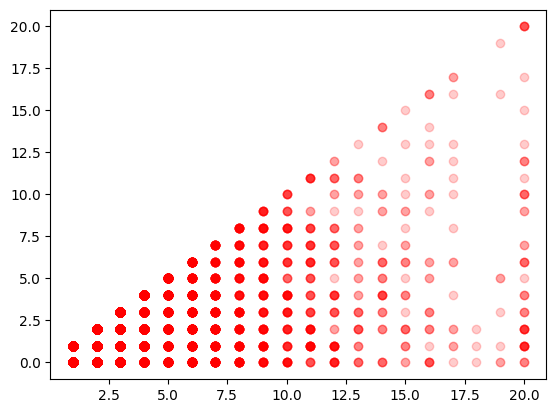

In [69]:
import matplotlib.pyplot as plt 
plt.scatter(test_labels['gt_count'],test_labels['hits'], color = 'red', alpha = 0.2)

# Save sumission

In [65]:
final.to_csv('submission.csv', index = False)

#Submit


In [66]:
!kaggle competitions submit -c otto-recommender-system -f submission.csv -m "hehe"

100%|████████████████████████████████████████| 782M/782M [00:39<00:00, 21.0MB/s]
Successfully submitted to OTTO – Multi-Objective Recommender System